<a href="https://colab.research.google.com/github/jmollan/PUCP/blob/main/Examen_2_Fin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, model_selection, svm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from pandas.core.frame import DataFrame
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
import math
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime as dt
from IPython.display import display

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [64]:
df = pd.read_excel ("BASE DATA THE COCA COLA COMPANY.xlsx")


In [65]:
print(df.head(20))


     Año  MES        PRODUCTO PRESENTACIÓN  PAIS     ZONA  PRECIO  \
0   2017    1       COCA COLA   2.5 LITROS  PERU  ORIENTE     9.2   
1   2017    1       COCA COLA  MEDIO LITRO  PERU    NORTE     2.9   
2   2017    1           FANTA  MEDIO LITRO  PERU  ORIENTE     2.0   
3   2017    1       COCA COLA  MEDIO LITRO  PERU     LIMA     2.9   
4   2017    1           FANTA     2 LITROS  PERU  ORIENTE     5.4   
5   2017    1           FANTA     2 LITROS  PERU     LIMA     5.4   
6   2017    1      FANTA ZERO  MEDIO LITRO  PERU   CENTRO     2.5   
7   2017    1      FANTA ZERO     2 LITROS  PERU     LIMA     6.0   
8   2017    1      FANTA ZERO     2 LITROS  PERU  ORIENTE     6.0   
9   2017    1  INCA KOLA ZERO  MEDIO LITRO  PERU   CENTRO     3.0   
10  2017    1  INCA KOLA ZERO   2.5 LITROS  PERU    NORTE     9.2   
11  2017    1  INCA KOLA ZERO  MEDIO LITRO  PERU  ORIENTE     3.0   
12  2017    1  COCA COLA ZERO   2.5 LITROS  PERU   CENTRO     9.2   
13  2017    1  COCA COLA ZERO   2.

In [66]:
SALIDAXZONA = df.groupby('ZONA')['VENTAS'].sum()

In [67]:
print(SALIDAXZONA)

ZONA
CENTRO     1.272378e+08
LIMA       1.180202e+08
NORTE      1.335199e+08
ORIENTE    1.611711e+08
SUR        1.350457e+08
Name: VENTAS, dtype: float64


<Axes: xlabel='ZONA'>

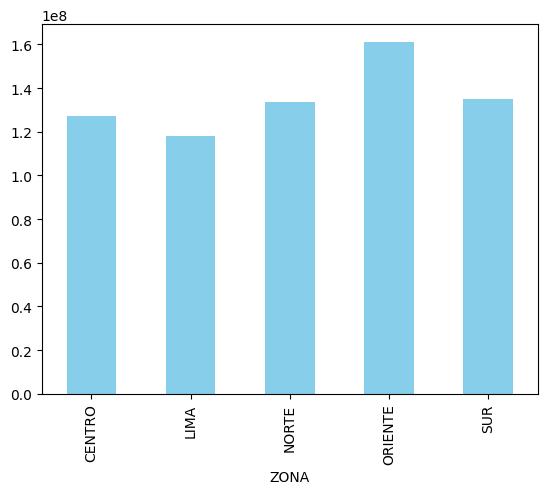

In [68]:
SALIDAXZONA.plot(kind='bar',color='skyblue')


In [69]:
print(SALIDAXZONA)


ZONA
CENTRO     1.272378e+08
LIMA       1.180202e+08
NORTE      1.335199e+08
ORIENTE    1.611711e+08
SUR        1.350457e+08
Name: VENTAS, dtype: float64


In [70]:
PRODUCTOS_UNICOS = df['PRODUCTO'].unique()

In [71]:
print(PRODUCTOS_UNICOS)


['COCA COLA' 'FANTA' 'FANTA ZERO' 'INCA KOLA ZERO' 'COCA COLA ZERO'
 'SPRITE' 'SPRITE ZERO' 'INCA KOLA']


In [72]:
VENTAS_PRODUCTO = df.groupby('PRODUCTO')['VENTAS'].sum()
VENTAS_PRODUCTO_ZONA = df.groupby(['ZONA','PRODUCTO'])['VENTAS'].sum()

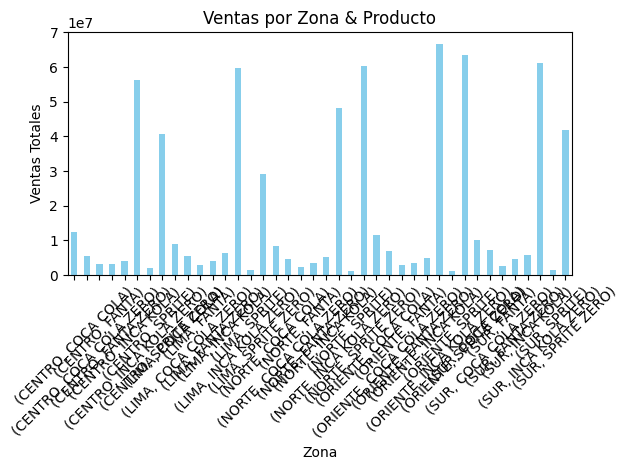

In [73]:
VENTAS_PRODUCTO_ZONA.plot(kind='bar',color='skyblue')
plt.title('Ventas por Zona & Producto')
plt.xlabel('Zona')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=45)
plt.tight_layout()

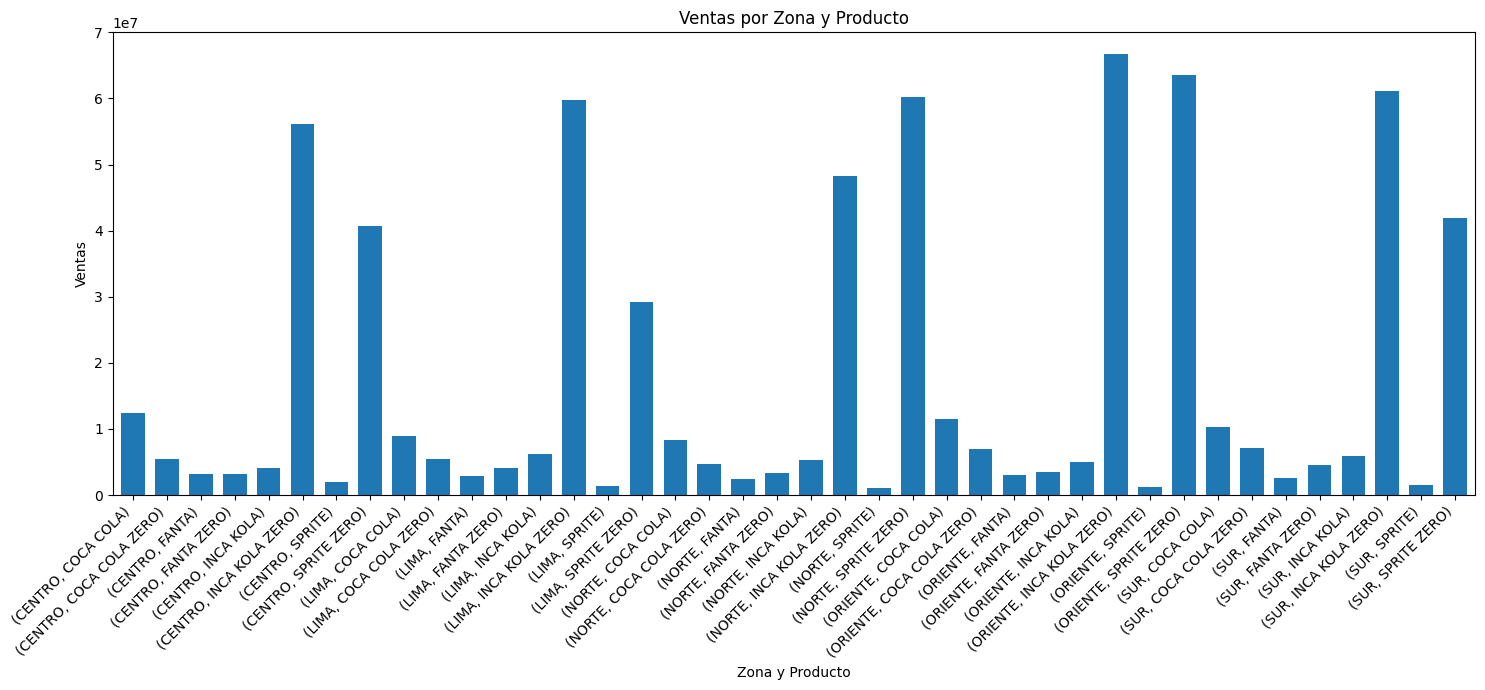

In [74]:
import matplotlib.pyplot as plt

# Agrupar datos
VENTAS_PRODUCTO_ZONA = df.groupby(['ZONA','PRODUCTO'])['VENTAS'].sum()

# Crear gráfico
plt.figure(figsize=(15, 7))  # Ajustar tamaño del gráfico
VENTAS_PRODUCTO_ZONA.plot(kind='bar', width=0.7)  # Gráfico de barras con un ancho de barra de 0.7

# Rotar etiquetas del eje x
plt.xticks(rotation=45, ha='right')

# Título y etiquetas
plt.title('Ventas por Zona y Producto')
plt.xlabel('Zona y Producto')
plt.ylabel('Ventas')

# Mostrar gráfico
plt.tight_layout()
plt.show()


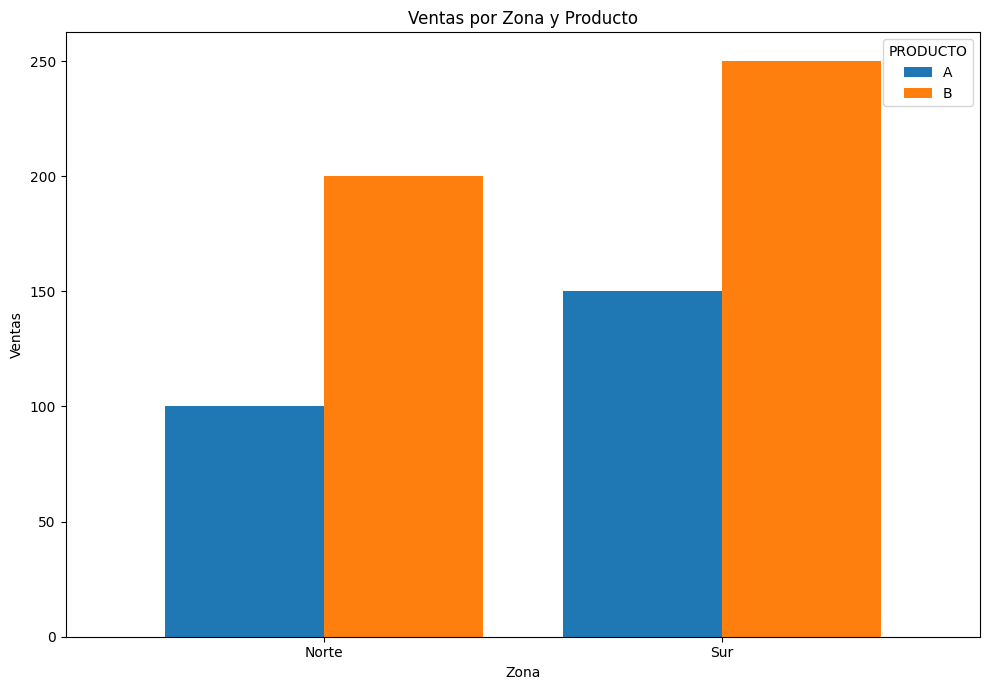

In [75]:
import matplotlib.pyplot as plt
import pandas as pd

# Supongamos que tu DataFrame original tiene una estructura similar a esta:
data = {
    'ZONA': ['Norte', 'Norte', 'Sur', 'Sur'],
    'PRODUCTO': ['A', 'B', 'A', 'B'],
    'VENTAS': [100, 200, 150, 250]
}
df = pd.DataFrame(data)

# Agrupa y reestructura el DataFrame
pivot_df = df.pivot(index='ZONA', columns='PRODUCTO', values='VENTAS')

# Gráfico de barras agrupadas
ax = pivot_df.plot(kind='bar', figsize=(10, 7), width=0.8)

# Título y etiquetas
plt.title('Ventas por Zona y Producto')
plt.xlabel('Zona')
plt.ylabel('Ventas')
plt.xticks(rotation=0)  # Asegurarse de que las etiquetas no estén rotadas
plt.tight_layout()

plt.show()


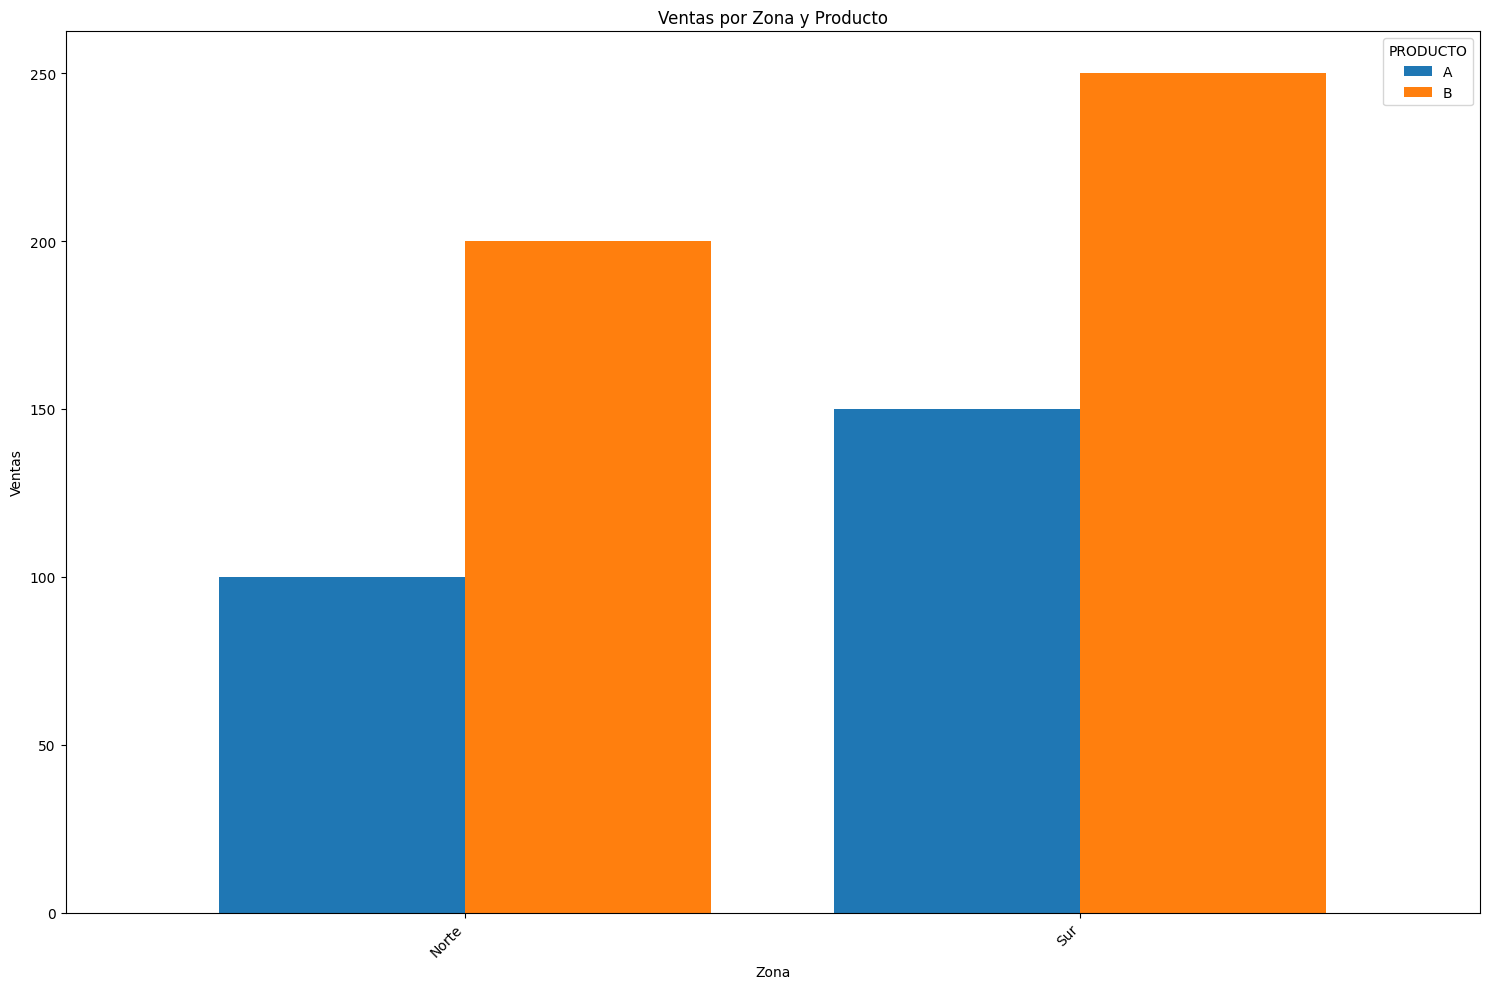

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

# Agrupar datos y reestructurar el DataFrame
pivot_df = df.groupby(['ZONA', 'PRODUCTO'])['VENTAS'].sum().unstack()

# Gráfico de barras agrupadas
ax = pivot_df.plot(kind='bar', figsize=(15, 10), width=0.8)

# Título y etiquetas
plt.title('Ventas por Zona y Producto')
plt.xlabel('Zona')
plt.ylabel('Ventas')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas para mejor visualización
plt.tight_layout()

plt.show()


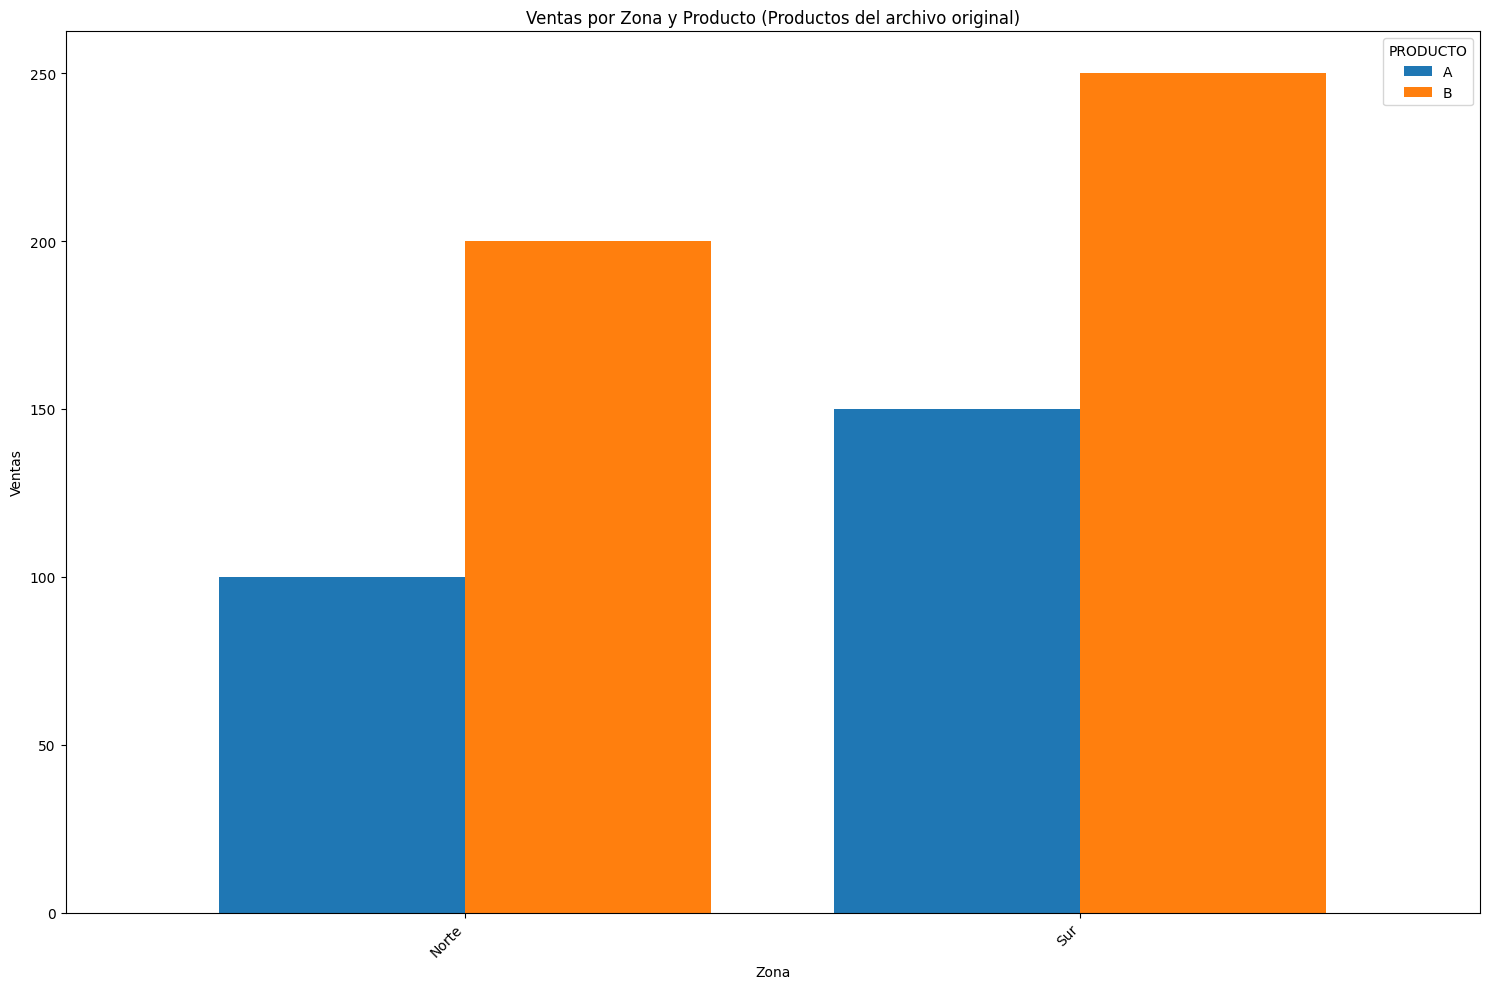

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

# Agrupar datos y reestructurar el DataFrame
pivot_df = df.groupby(['ZONA', 'PRODUCTO'])['VENTAS'].sum().unstack()

# Filtrar el DataFrame para incluir solo los productos que están presentes en el DataFrame original
productos_presentes = df['PRODUCTO'].unique()
filtered_pivot_df = pivot_df[productos_presentes]

# Gráfico de barras agrupadas
ax = filtered_pivot_df.plot(kind='bar', figsize=(15, 10), width=0.8)

# Título y etiquetas
plt.title('Ventas por Zona y Producto (Productos del archivo original)')
plt.xlabel('Zona')
plt.ylabel('Ventas')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas para mejor visualización
plt.tight_layout()

plt.show()


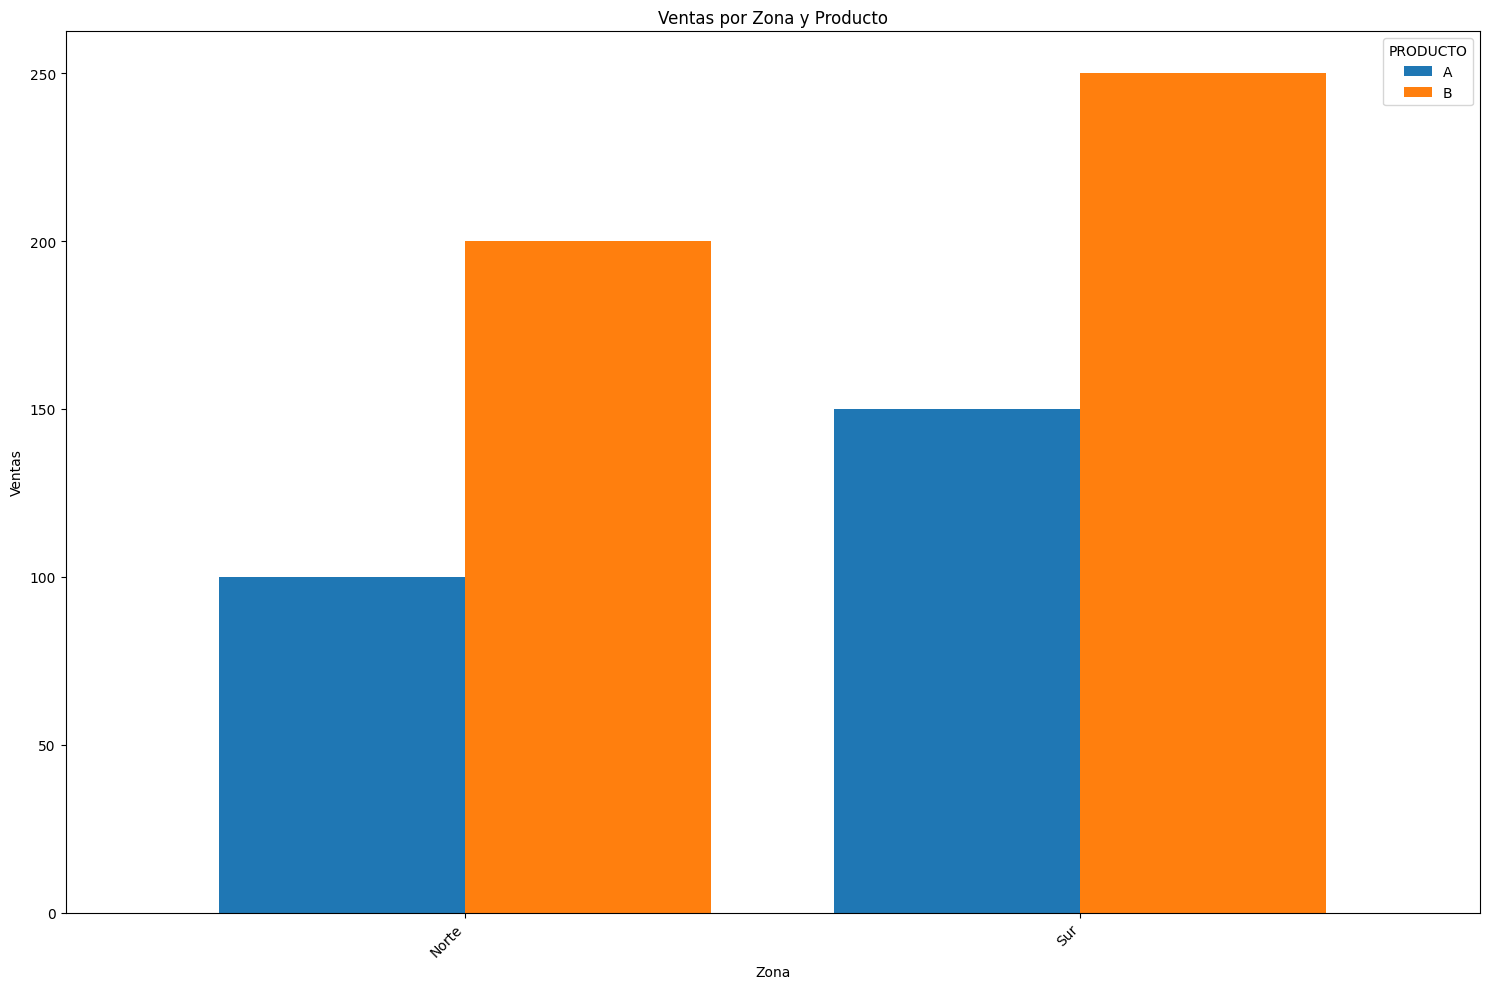

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

# Agrupar datos y reestructurar el DataFrame
pivot_df = df.groupby(['ZONA', 'PRODUCTO'])['VENTAS'].sum().unstack()

# Gráfico de barras agrupadas
ax = pivot_df.plot(kind='bar', figsize=(15, 10), width=0.8)

# Título y etiquetas
plt.title('Ventas por Zona y Producto')
plt.xlabel('Zona')
plt.ylabel('Ventas')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas para mejor visualización
plt.tight_layout()

plt.show()


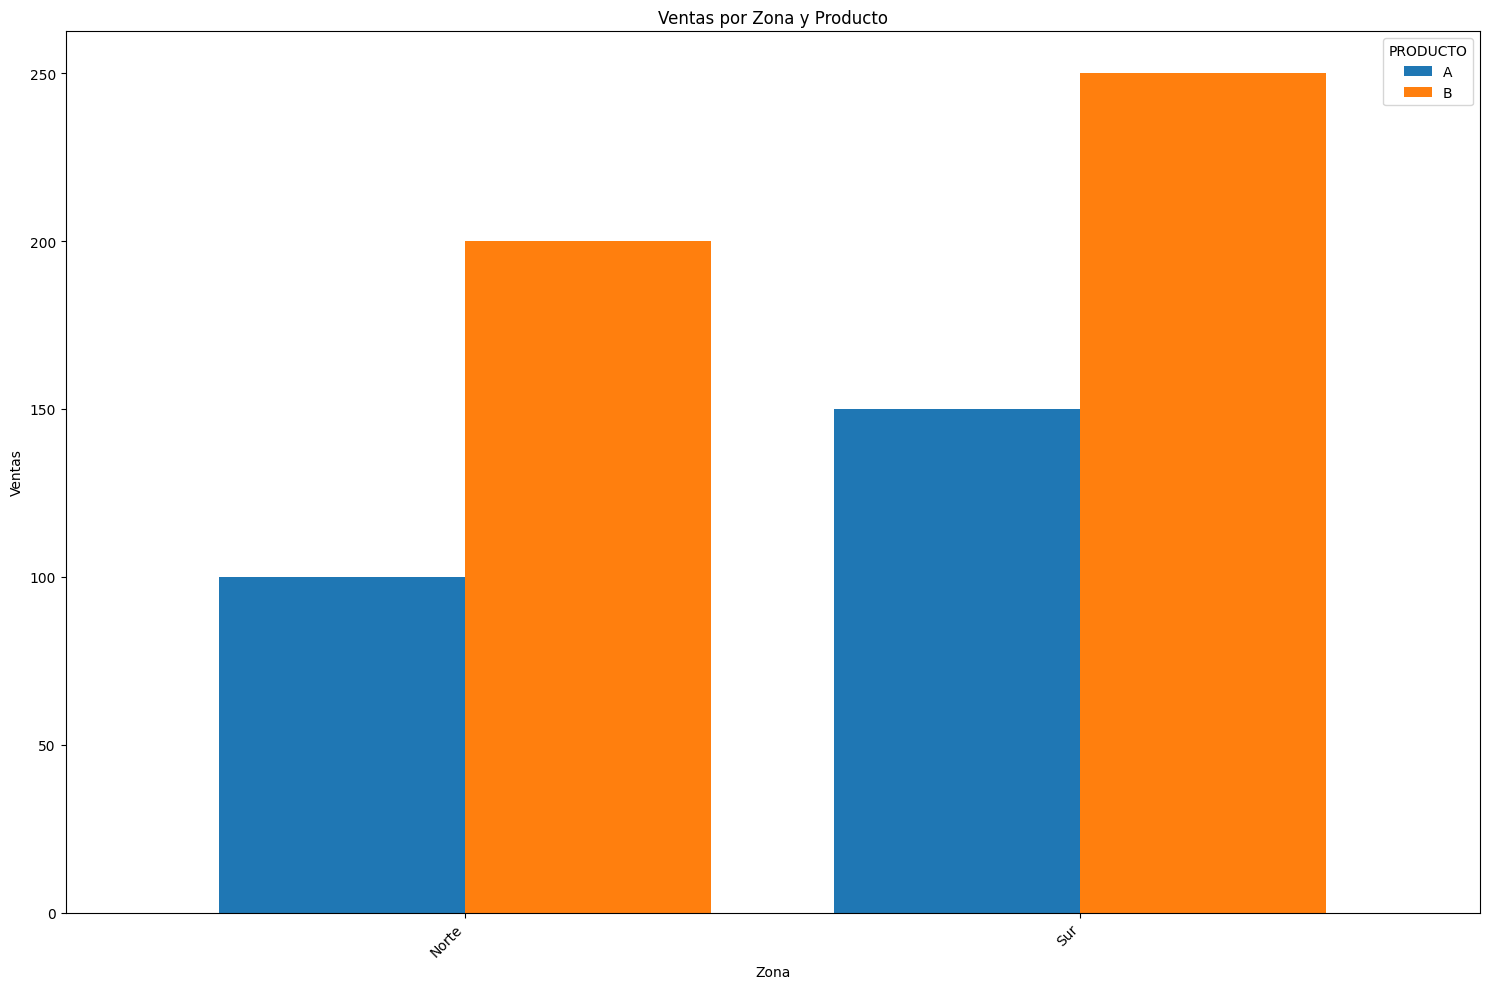

In [79]:
# Agrupar datos y reestructurar el DataFrame
pivot_df = df.groupby(['ZONA', 'PRODUCTO'])['VENTAS'].sum().unstack()

# Gráfico de barras agrupadas
ax = pivot_df.plot(kind='bar', figsize=(15, 10), width=0.8)

# Título y etiquetas
plt.title('Ventas por Zona y Producto')
plt.xlabel('Zona')
plt.ylabel('Ventas')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas para mejor visualización
plt.tight_layout()

plt.show()


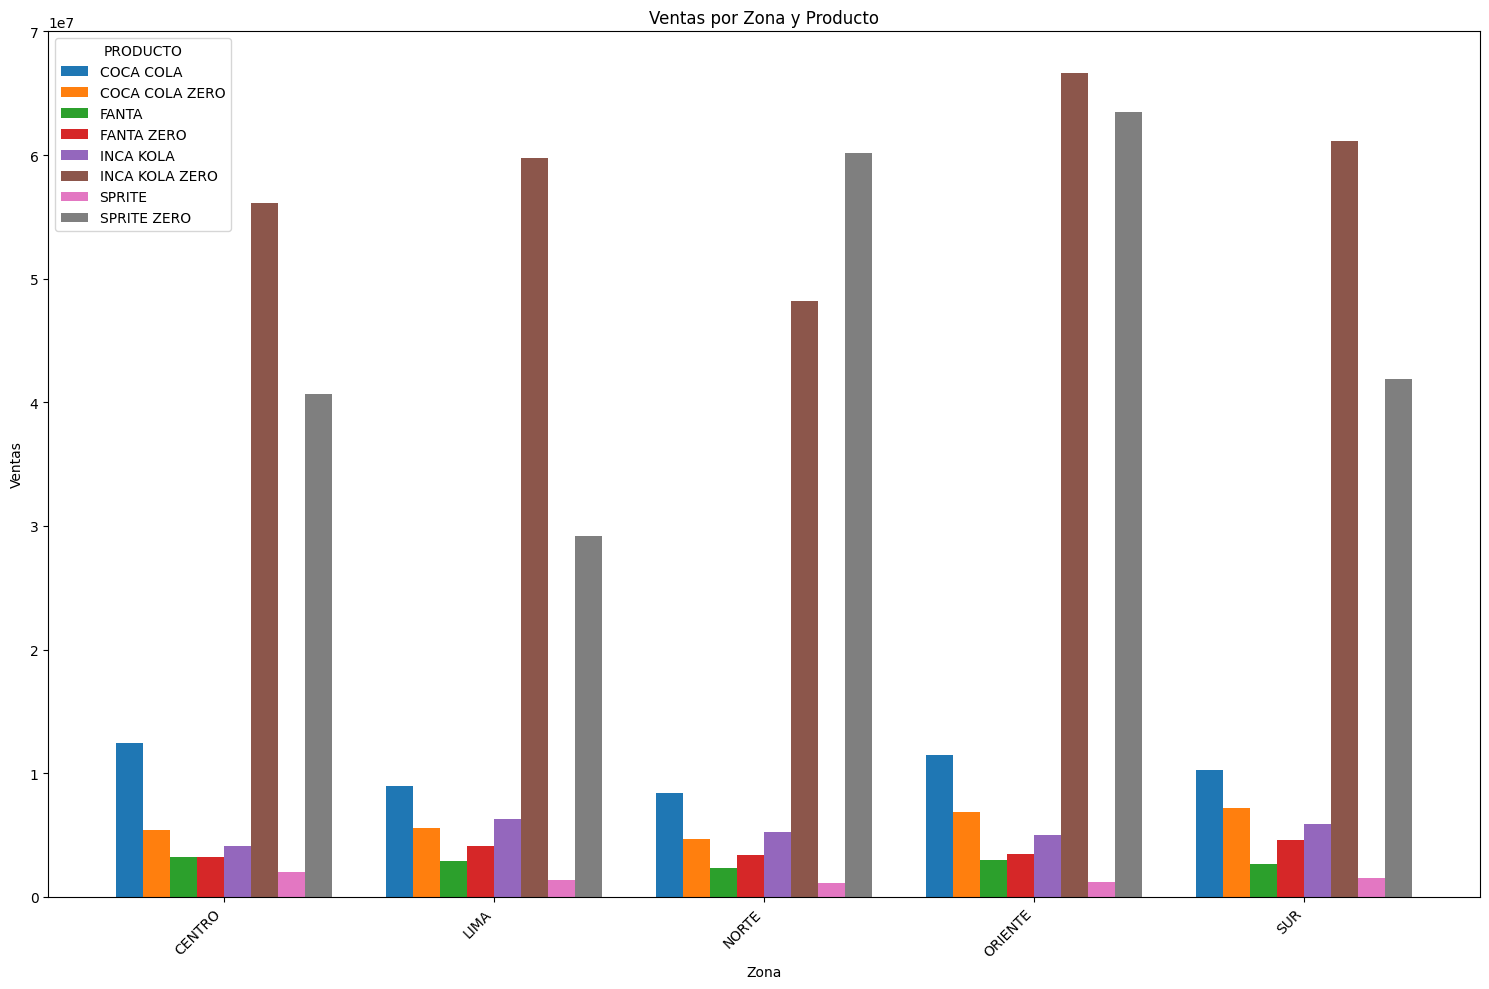

In [80]:
import pandas as pd
import matplotlib.pyplot as plt

# Leemos la base de datos original
df = pd.read_excel ("BASE DATA THE COCA COLA COMPANY.xlsx")

# Agrupar datos y reestructurar el DataFrame
pivot_df = df.groupby(['ZONA', 'PRODUCTO'])['VENTAS'].sum().unstack()

# Gráfico de barras agrupadas
ax = pivot_df.plot(kind='bar', figsize=(15, 10), width=0.8)

# Título y etiquetas
plt.title('Ventas por Zona y Producto')
plt.xlabel('Zona')
plt.ylabel('Ventas')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas para mejor visualización
plt.tight_layout()

plt.show()



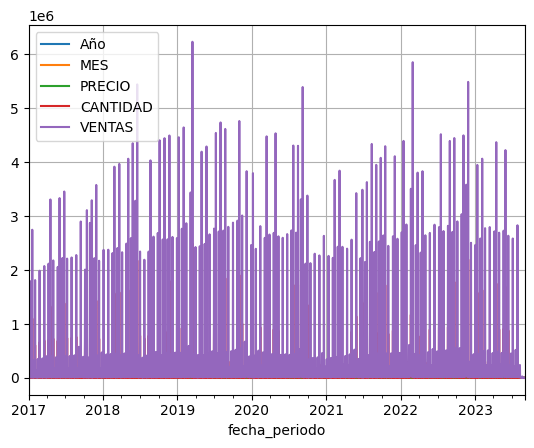

In [83]:
df.plot()
plt.grid()
plt.show()

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Suponiendo que ya has cargado el DataFrame df desde el archivo Excel

# Convertir la columna 'fecha_periodo' a formato datetime y establecerla como índice
df['fecha_periodo'] = pd.to_datetime(df['fecha_periodo'])
df.set_index('fecha_periodo', inplace=True)

# Resamplear los datos a una frecuencia mensual por ZONA
df_resampled_zone = df.groupby('ZONA').resample('M')['VENTAS'].sum().unstack(level=0)

# Realizar la descomposición estacional con el modelo aditivo para cada ZONA y graficarla
fig, axes = plt.subplots(len(df_resampled_zone.columns), 4, figsize=(15, 20))

for i, zona in enumerate(df_resampled_zone.columns):
    decomposition = seasonal_decompose(df_resampled_zone[zona], model='additive', extrapolate_trend='freq')

    df_resampled_zone[zona].plot(ax=axes[i, 0], title='Original Series: ' + zona)
    decomposition.trend.plot(ax=axes[i, 1], title='Trend')
    decomposition.seasonal.plot(ax=axes[i, 2], title='Seasonality')
    decomposition.resid.plot(ax=axes[i, 3], title='Residuals')

plt.tight_layout()
plt.show()


KeyError: ignored

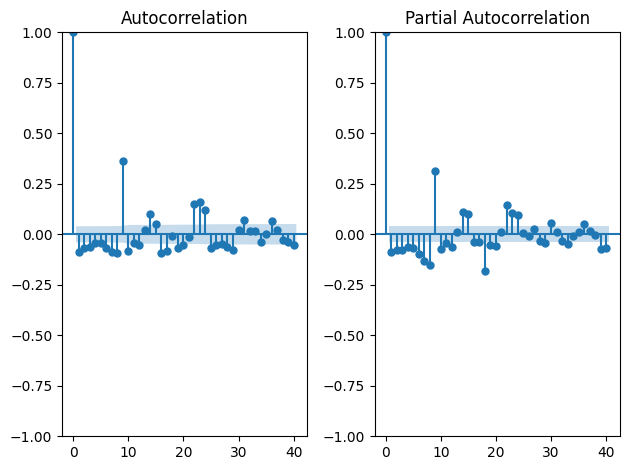

In [89]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1, 2)

# Plot ACF
plot_acf(df['VENTAS'], lags=40, ax=axes[0])

# Plot PACF
plot_pacf(df['VENTAS'], lags=40, ax=axes[1])

plt.tight_layout()
plt.show()

In [90]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define initial parameters
p, d, q = 1, 1, 1
P, D, Q, S = 1, 1, 1, 12

# Fit the SARIMA model
sarima_model = SARIMAX(df['VENTAS'], order=(p, d, q), seasonal_order=(P, D, Q, S))
sarima_result = sarima_model.fit(disp=False)

# Display the model summary
sarima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                             VENTAS   No. Observations:                 2435
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood              -36891.587
Date:                            Mon, 21 Aug 2023   AIC                          73793.174
Time:                                    03:32:33   BIC                          73822.136
Sample:                                01-01-2017   HQIC                         73803.706
                                     - 09-01-2023                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0895      0.185     -0.484      0.628      -0.452       0.273
ma.L1         -0.9964      0.012    -84.984      0.000      -1.019      -0.973
ar.S.L12      -0.0804      0.165     -0.487      0.626      -0.404       0.243
ma.S.L12      -0.9557      0.023    -41.042      0.000      -1.001      -0.910
sigma2      1.905e+12   2.34e-13   8.13e+24      0.000     1.9e+12     1.9e+12
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):             29258.19
Prob(Q):                              0.71   Prob(JB):                         0.00
Heteroskedasticity (H):               1.17   Skew:                             3.80
Prob(H) (two-sided):                  0.03   Kurtosis:                        18.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.89e+39. Standard errors may be unstable.
"""

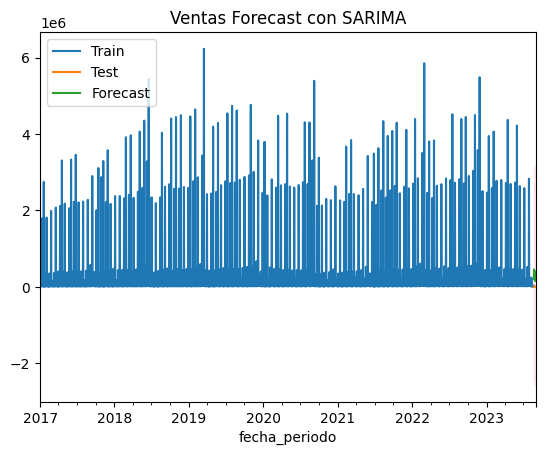

In [91]:
# Split the data into train and test sets
train = df['VENTAS'][:-12]
test = df['VENTAS'][-12:]

# Fit the SARIMA model on the training data
sarima_train_model = SARIMAX(train, order=(p, d, q), seasonal_order=(P, D, Q, S))
sarima_train_result = sarima_train_model.fit(disp=False)

# Make predictions on the test set
forecast = sarima_train_result.get_forecast(steps=12)
mean_forecast = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Plot the data
#plt.figure(figsize=(15, 6))
train.plot(label='Train')
test.plot(label='Test')
mean_forecast.plot(label='Forecast')
plt.fill_between(confidence_intervals.index, confidence_intervals.iloc[:, 0],
                 confidence_intervals.iloc[:, 1], color='pink', alpha=0.3)
plt.legend(loc='upper left')
plt.title('Ventas Forecast con SARIMA')
plt.show()

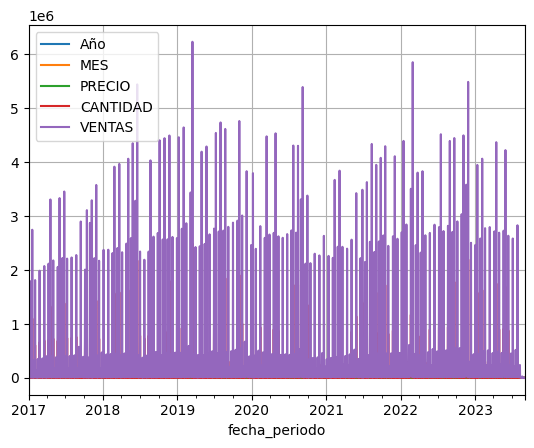

In [92]:
df.plot()
plt.grid()
plt.show()

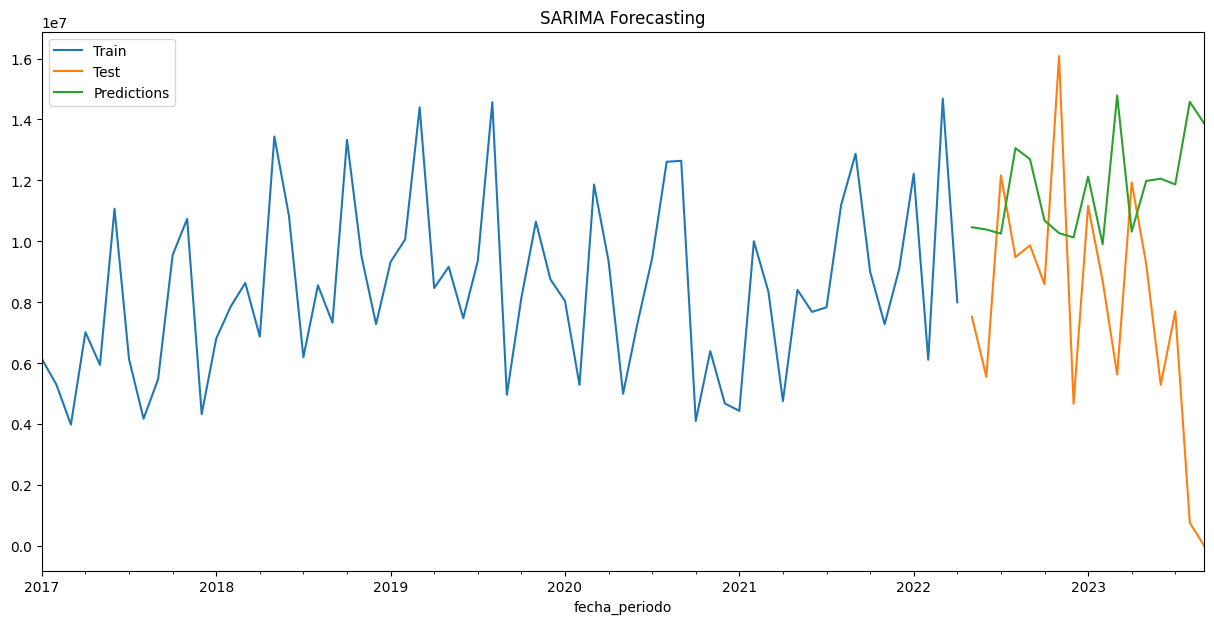

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Leer el archivo Excel corregido
df_corrected = pd.read_excel("BASE DATA THE COCA COLA COMPANY.xlsx")

# Convertir la columna 'fecha_periodo' a formato datetime y establecerla como índice
df_corrected['fecha_periodo'] = pd.to_datetime(df_corrected['fecha_periodo'])
df_corrected.set_index('fecha_periodo', inplace=True)

# Agregar ventas
df_aggregated = df_corrected['VENTAS'].resample('M').sum()

# Dividir datos en entrenamiento y prueba
train_size = int(0.8 * len(df_aggregated))
train, test = df_aggregated[:train_size], df_aggregated[train_size:]

# Ajustar el modelo SARIMA
p, d, q = 1, 1, 1
P, D, Q, S = 1, 1, 1, 12
sarima_model = SARIMAX(train, order=(p, d, q), seasonal_order=(P, D, Q, S))
sarima_result = sarima_model.fit(disp=False)

# Realizar predicciones
predictions = sarima_result.predict(start=test.index[0], end=test.index[-1], dynamic=True)

# Graficar resultados
plt.figure(figsize=(15, 7))
train.plot(label='Train', legend=True)
test.plot(label='Test', legend=True)
predictions.plot(label='Predictions', legend=True)
plt.title('SARIMA Forecasting')
plt.show()


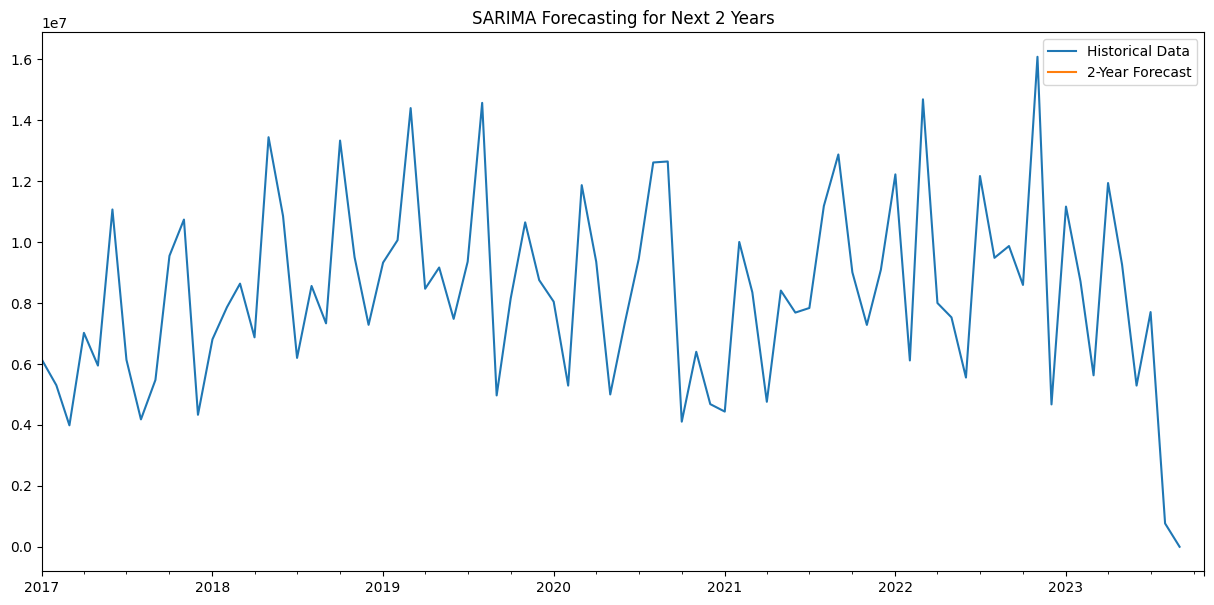

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Leer el archivo Excel corregido
df_corrected = pd.read_excel("BASE DATA THE COCA COLA COMPANY.xlsx")

# Convertir la columna 'fecha_periodo' a formato datetime y establecerla como índice
df_corrected['fecha_periodo'] = pd.to_datetime(df_corrected['fecha_periodo'])
df_corrected.set_index('fecha_periodo', inplace=True)

# Agregar ventas
df_aggregated = df_corrected['VENTAS'].resample('M').sum()

# Ajustar el modelo SARIMA
p, d, q = 1, 1, 1
P, D, Q, S = 1, 1, 1, 12
sarima_model = SARIMAX(df_aggregated, order=(p, d, q), seasonal_order=(P, D, Q, S))
sarima_result = sarima_model.fit(disp=False)

# Realizar predicciones futuras para los próximos 2 años (24 meses)
forecast_period = 24
forecast = sarima_result.get_forecast(steps=forecast_period)
forecast_index = pd.date_range(df_aggregated.index[-1], periods=forecast_period+1, closed='right')
forecast_series = pd.Series(forecast.predicted_mean, index=forecast_index)

# Graficar resultados con las predicciones futuras
plt.figure(figsize=(15, 7))
df_aggregated.plot(label='Historical Data', legend=True)
forecast_series.plot(label='2-Year Forecast', legend=True)
plt.title('SARIMA Forecasting for Next 2 Years')
plt.show()


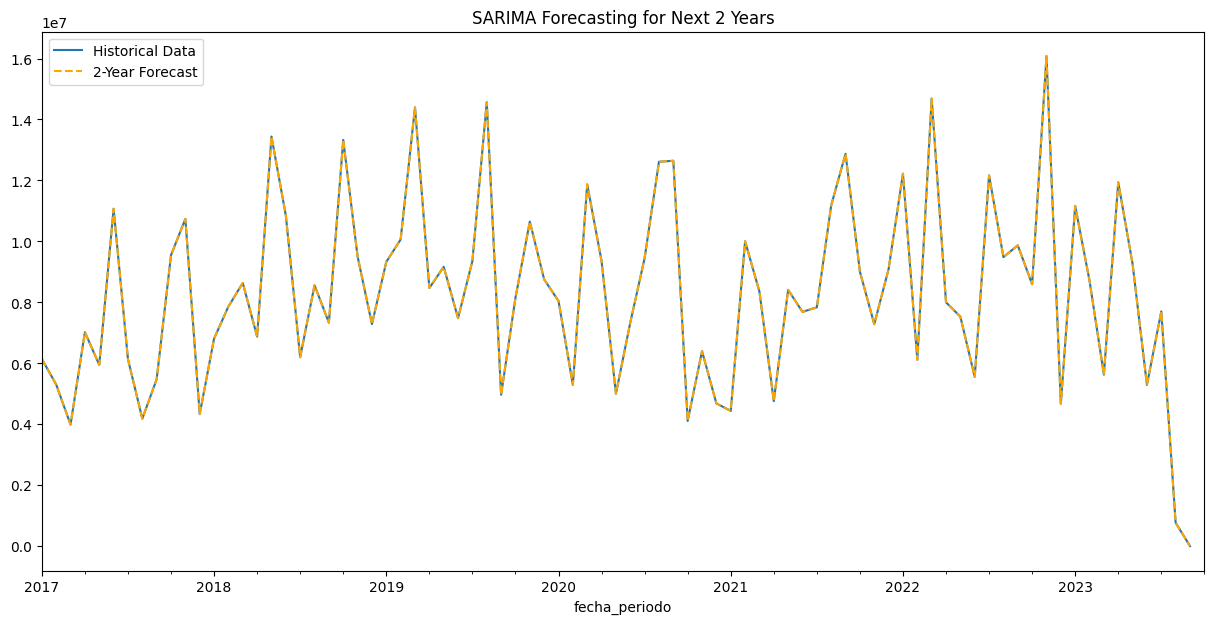

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Leer el archivo Excel corregido
df_corrected = pd.read_excel("BASE DATA THE COCA COLA COMPANY.xlsx")

# Convertir la columna 'fecha_periodo' a formato datetime y establecerla como índice
df_corrected['fecha_periodo'] = pd.to_datetime(df_corrected['fecha_periodo'])
df_corrected.set_index('fecha_periodo', inplace=True)

# Agregar ventas
df_aggregated = df_corrected['VENTAS'].resample('M').sum()

# Ajustar el modelo SARIMA
p, d, q = 1, 1, 1
P, D, Q, S = 1, 1, 1, 12
sarima_model = SARIMAX(df_aggregated, order=(p, d, q), seasonal_order=(P, D, Q, S))
sarima_result = sarima_model.fit(disp=False)

# Realizar predicciones futuras para los próximos 2 años (24 meses)
forecast_period = 24
forecast = sarima_result.get_forecast(steps=forecast_period)
forecast_index = pd.date_range(df_aggregated.index[-1], periods=forecast_period+1, closed='right')
forecast_series = pd.Series(forecast.predicted_mean, index=forecast_index)

# Extender el DataFrame original con las predicciones futuras
extended_index = df_aggregated.index.union(forecast_index)
extended_series = df_aggregated.reindex(extended_index).combine_first(forecast_series)

# Graficar resultados con las predicciones futuras
plt.figure(figsize=(15, 7))
df_aggregated.plot(label='Historical Data', legend=True)
extended_series.plot(label='2-Year Forecast', legend=True, color='orange', linestyle='--')
plt.title('SARIMA Forecasting for Next 2 Years')
plt.show()


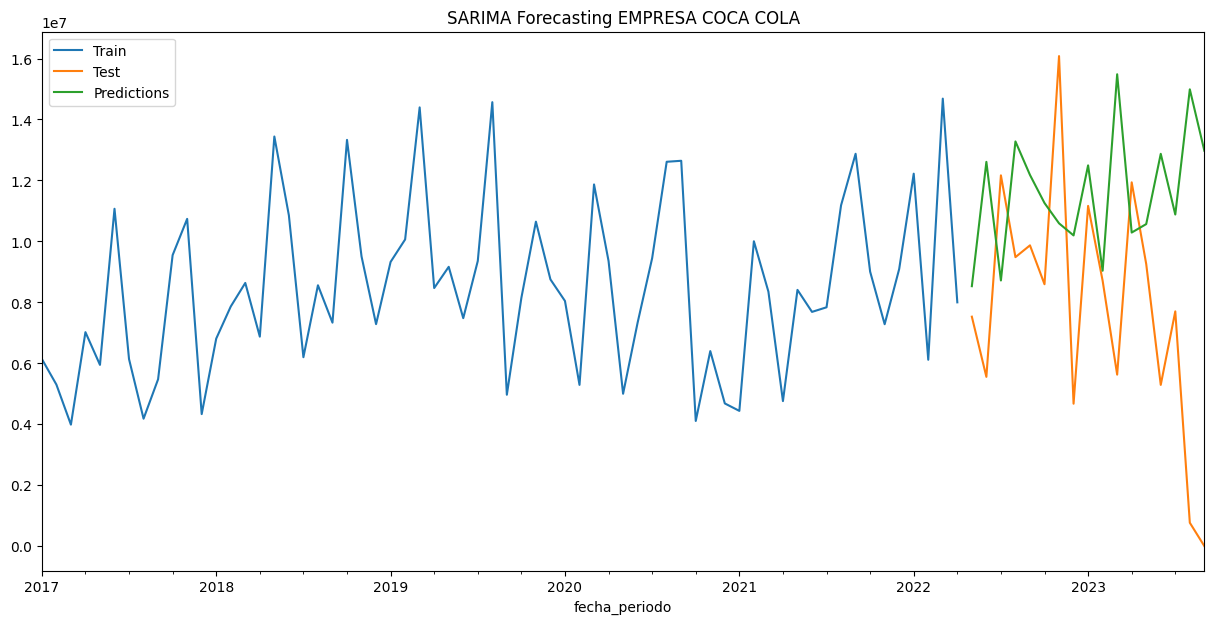

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Leer el archivo Excel corregido
df_corrected = pd.read_excel("BASE DATA THE COCA COLA COMPANY.xlsx")

# Convertir la columna 'fecha_periodo' a formato datetime y establecerla como índice
df_corrected['fecha_periodo'] = pd.to_datetime(df_corrected['fecha_periodo'])
df_corrected.set_index('fecha_periodo', inplace=True)

# Agregar ventas
df_aggregated = df_corrected['VENTAS'].resample('M').sum()

# Dividir datos en entrenamiento y prueba
train_size = int(0.8 * len(df_aggregated))
train, test = df_aggregated[:train_size], df_aggregated[train_size:]

# Ajustar el modelo SARIMA con los mejores parámetros encontrados
best_order = (2, 1, 2)
best_seasonal_order = (2, 1, 2, 12)
sarima_model = SARIMAX(train, order=best_order, seasonal_order=best_seasonal_order)
sarima_result = sarima_model.fit(disp=False)

# Realizar predicciones
predictions = sarima_result.predict(start=test.index[0], end=test.index[-1], dynamic=True)

# Graficar resultados
plt.figure(figsize=(15, 7))
train.plot(label='Train', legend=True)
test.plot(label='Test', legend=True)
predictions.plot(label='Predictions', legend=True)
plt.title('SARIMA Forecasting EMPRESA COCA COLA')
plt.show()


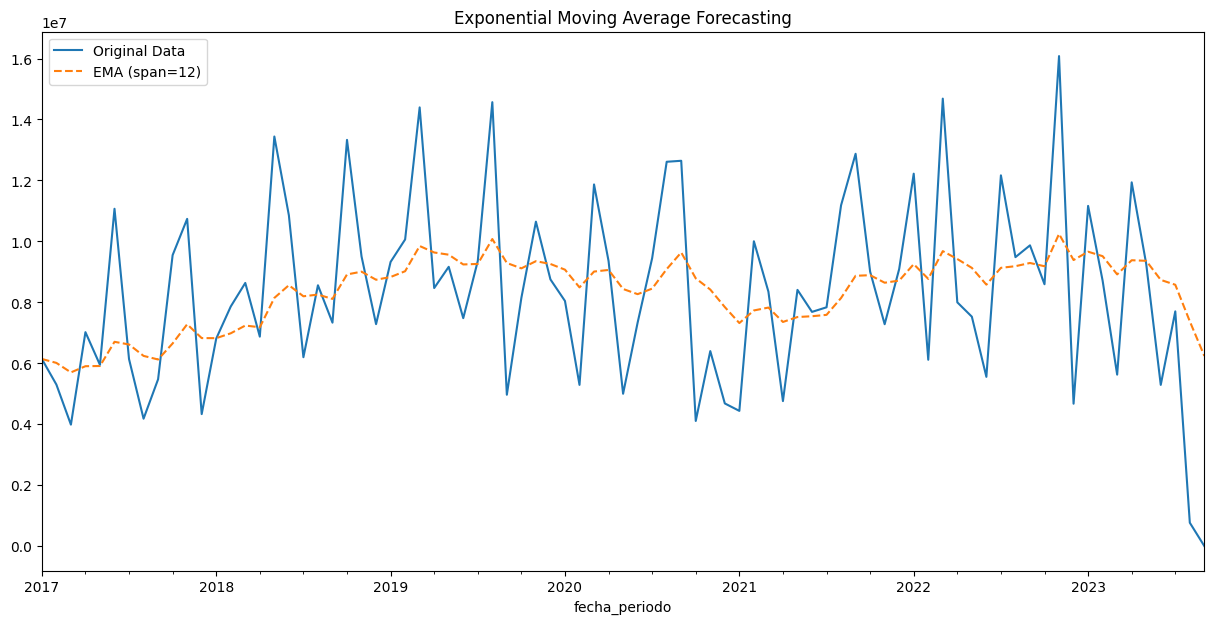

In [97]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer el archivo Excel
df_corrected = pd.read_excel("BASE DATA THE COCA COLA COMPANY.xlsx")

# Convertir la columna 'fecha_periodo' a formato datetime y establecerla como índice
df_corrected['fecha_periodo'] = pd.to_datetime(df_corrected['fecha_periodo'])
df_corrected.set_index('fecha_periodo', inplace=True)

# Agregar ventas
df_aggregated = df_corrected['VENTAS'].resample('M').sum()

# Calcular la Media Móvil Exponencial
span = 12  # Ajusta según tus necesidades (12 representa una EMA de un año para datos mensuales)
ema = df_aggregated.ewm(span=span, adjust=False).mean()

# Graficar resultados
plt.figure(figsize=(15, 7))
df_aggregated.plot(label='Original Data', legend=True)
ema.plot(label=f'EMA (span={span})', legend=True, linestyle='--')
plt.title('Exponential Moving Average Forecasting')
plt.show()


DEBUG:cmdstanpy:input tempfile: /tmp/tmpdlujgdwi/rwmgs357.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdlujgdwi/gxgwm33x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86143', 'data', 'file=/tmp/tmpdlujgdwi/rwmgs357.json', 'init=/tmp/tmpdlujgdwi/gxgwm33x.json', 'output', 'file=/tmp/tmpdlujgdwi/prophet_modeld64sse9k/prophet_model-20230821033512.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:35:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:35:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


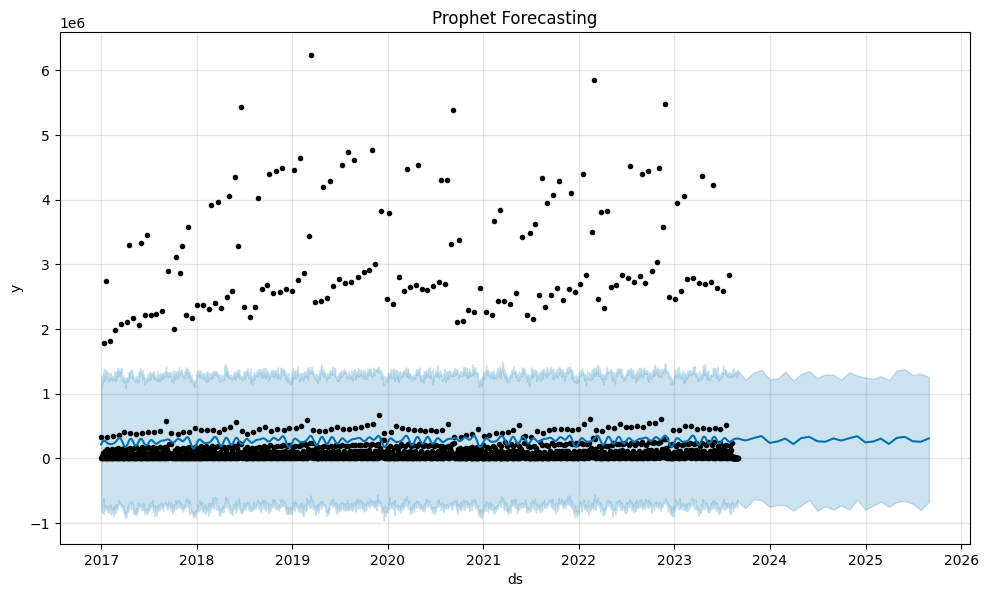

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Leer el archivo Excel
df_corrected = pd.read_excel("BASE DATA THE COCA COLA COMPANY.xlsx")

# Convertir la columna 'fecha_periodo' a formato datetime
df_corrected['fecha_periodo'] = pd.to_datetime(df_corrected['fecha_periodo'])

# Agregar ventas y preparar el DataFrame para Prophet
df_prophet = df_corrected.groupby('fecha_periodo')['VENTAS'].sum().reset_index()
df_prophet.columns = ['ds', 'y']

# Crear y ajustar el modelo Prophet
model = Prophet(yearly_seasonality=True, daily_seasonality=False, weekly_seasonality=False)
model.fit(df_prophet)

# Realizar predicciones futuras
future = model.make_future_dataframe(periods=24, freq='M')  # predicciones para los próximos 2 años
forecast = model.predict(future)

# Graficar resultados
fig = model.plot(forecast)

plt.title('Prophet Forecasting')
plt.show()


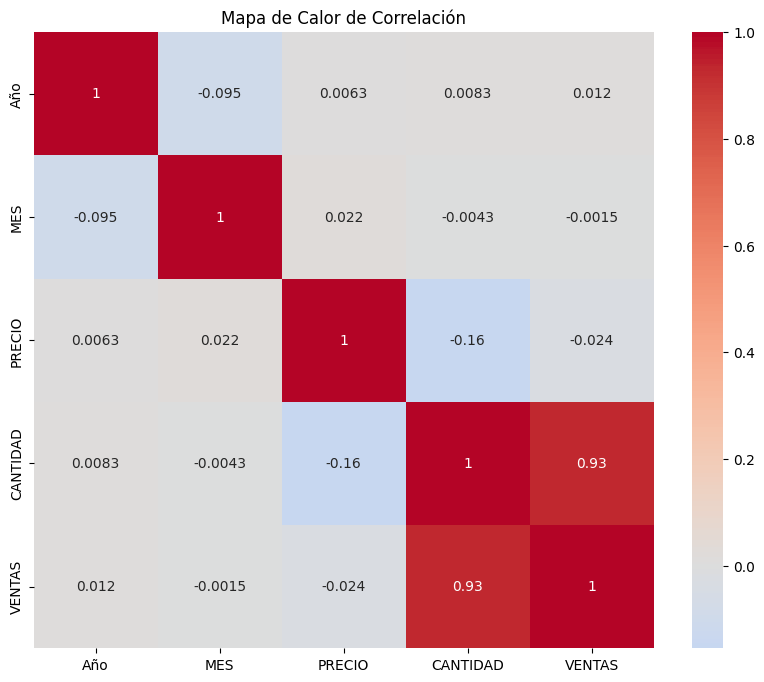

In [99]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar los datos
df = pd.read_excel("BASE DATA THE COCA COLA COMPANY.xlsx")

# Calcular la matriz de correlación
corr_matrix = df.corr()

# Crear un mapa de calor de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Mapa de Calor de Correlación')
plt.show()


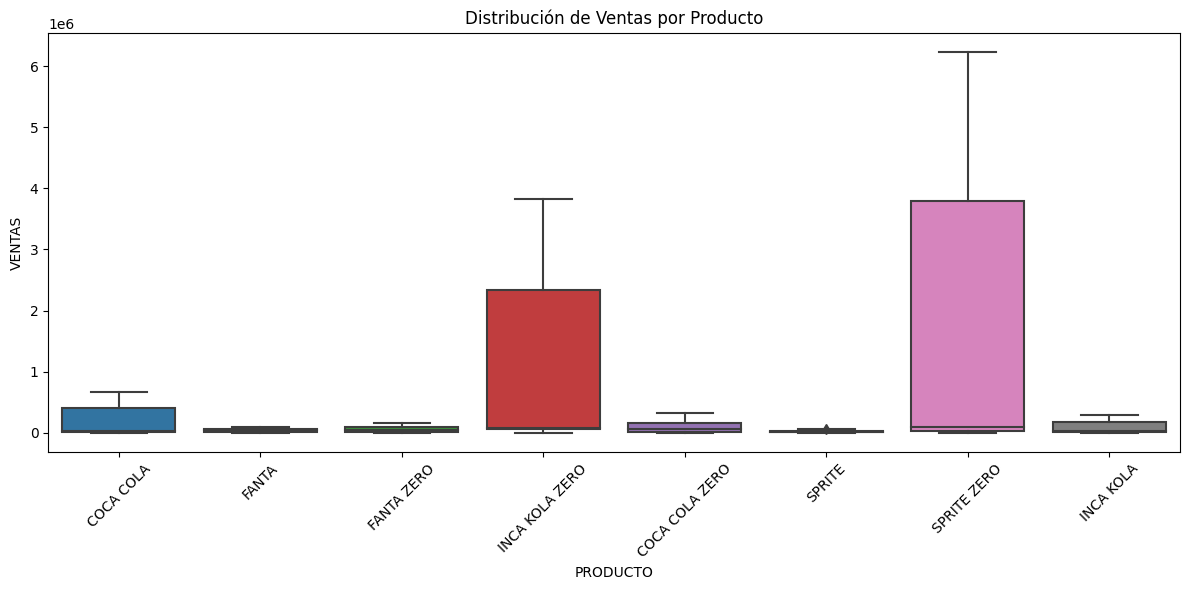

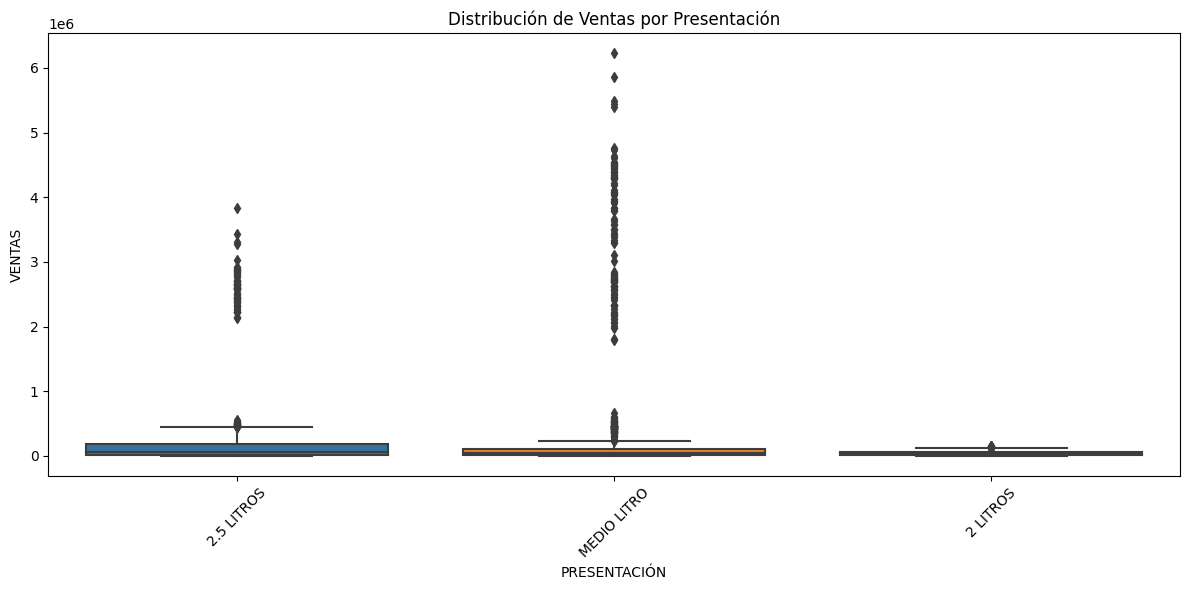

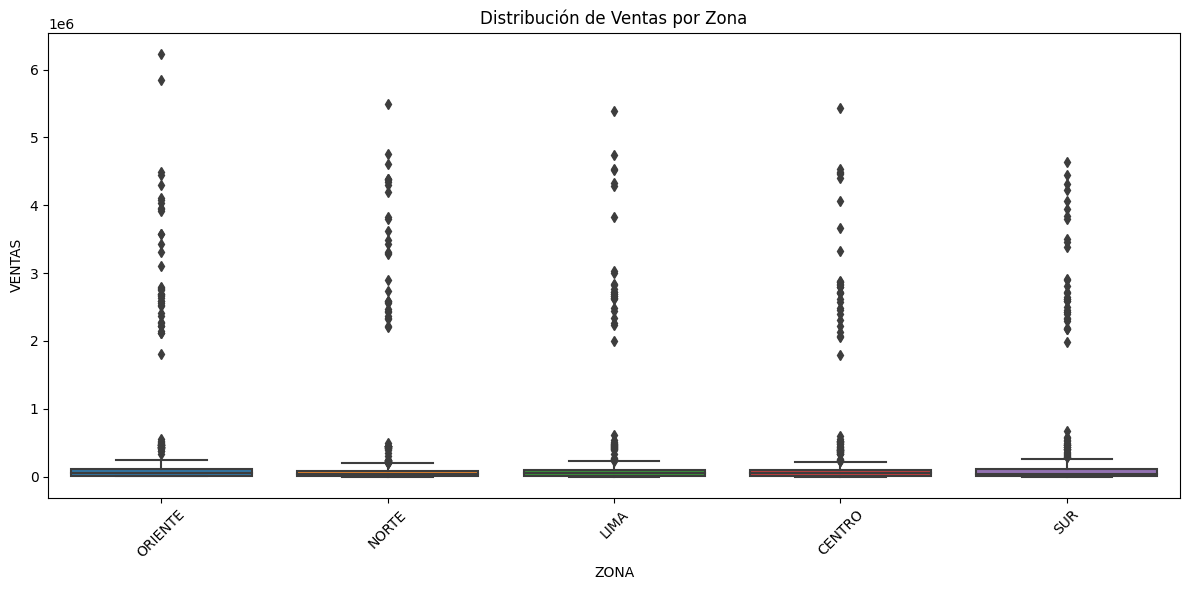

In [100]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar los datos
df = pd.read_excel("BASE DATA THE COCA COLA COMPANY.xlsx")

# Gráfico de caja para Ventas por Producto
plt.figure(figsize=(12, 6))
sns.boxplot(x='PRODUCTO', y='VENTAS', data=df)
plt.title('Distribución de Ventas por Producto')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gráfico de caja para Ventas por Presentación
plt.figure(figsize=(12, 6))
sns.boxplot(x='PRESENTACIÓN', y='VENTAS', data=df)
plt.title('Distribución de Ventas por Presentación')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gráfico de caja para Ventas por Zona
plt.figure(figsize=(12, 6))
sns.boxplot(x='ZONA', y='VENTAS', data=df)
plt.title('Distribución de Ventas por Zona')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


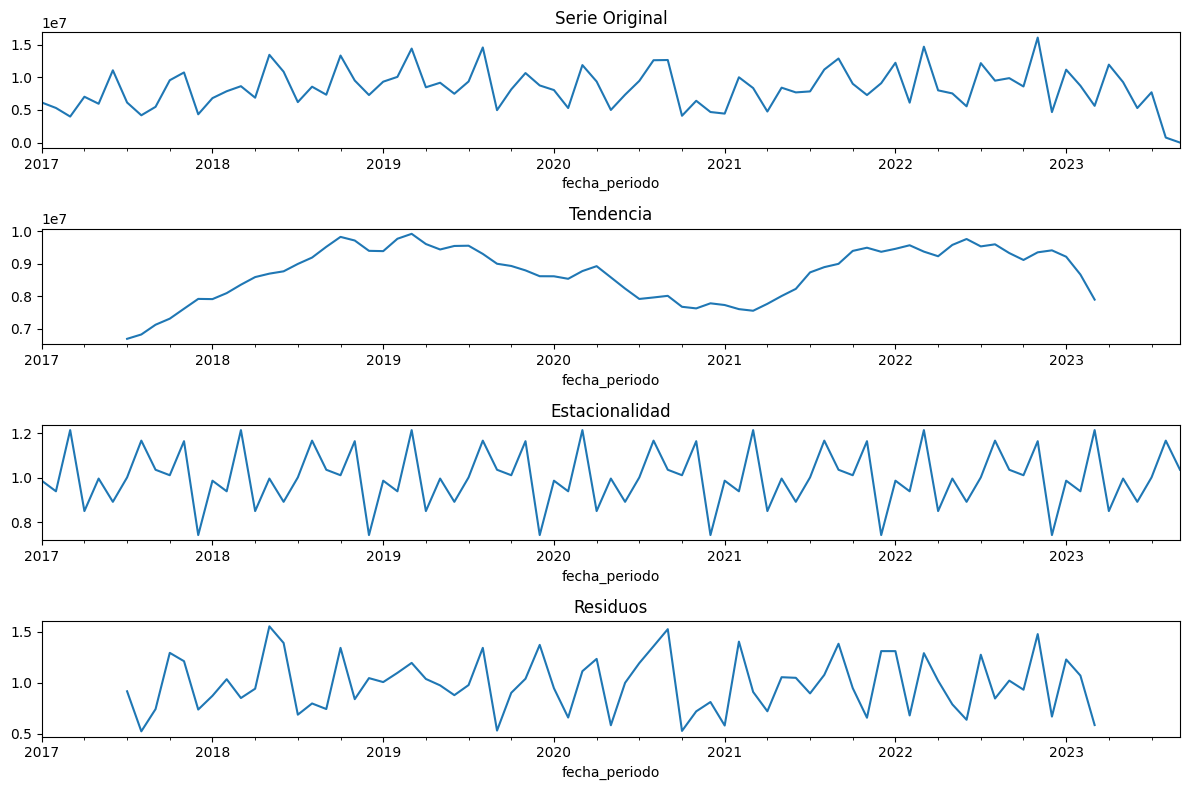

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Cargar los datos
df = pd.read_excel("BASE DATA THE COCA COLA COMPANY.xlsx")

# Convertir la columna 'fecha_periodo' a formato datetime y establecerla como índice
df['fecha_periodo'] = pd.to_datetime(df['fecha_periodo'])
df.set_index('fecha_periodo', inplace=True)

# Agregar las ventas para obtener una serie temporal
time_series = df['VENTAS'].resample('M').sum()

# Descomponer la serie temporal
result = seasonal_decompose(time_series, model='multiplicative')

# Plotear la serie original, tendencia, estacionalidad y residuos
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize=(12, 8))
result.observed.plot(ax=ax1, title='Serie Original')
result.trend.plot(ax=ax2, title='Tendencia')
result.seasonal.plot(ax=ax3, title='Estacionalidad')
result.resid.plot(ax=ax4, title='Residuos')
plt.tight_layout()
plt.show()


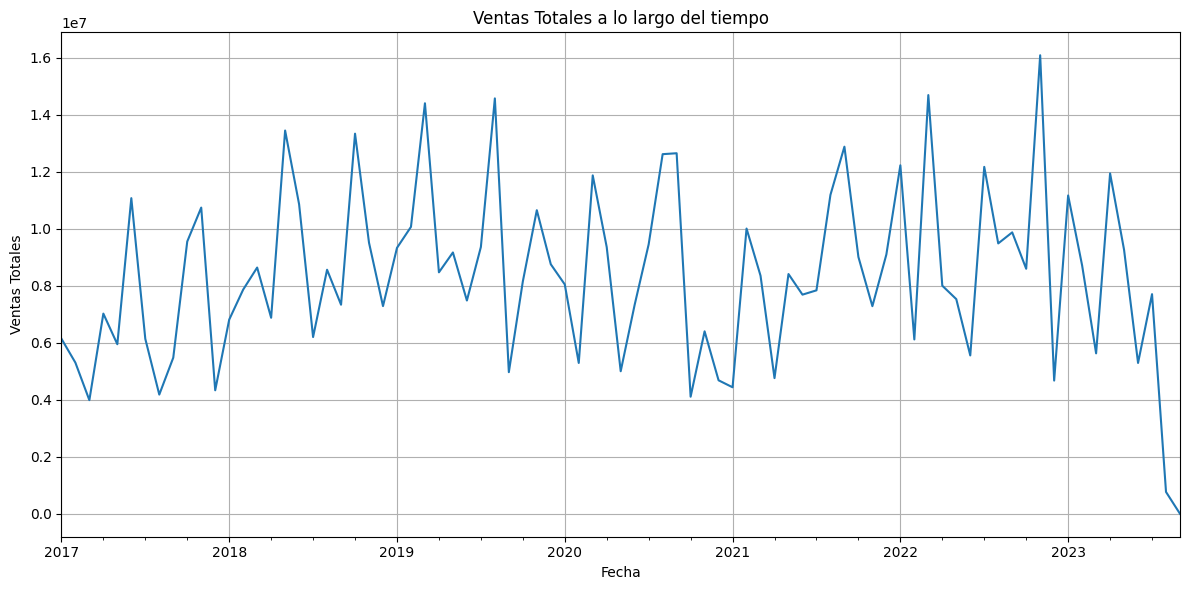

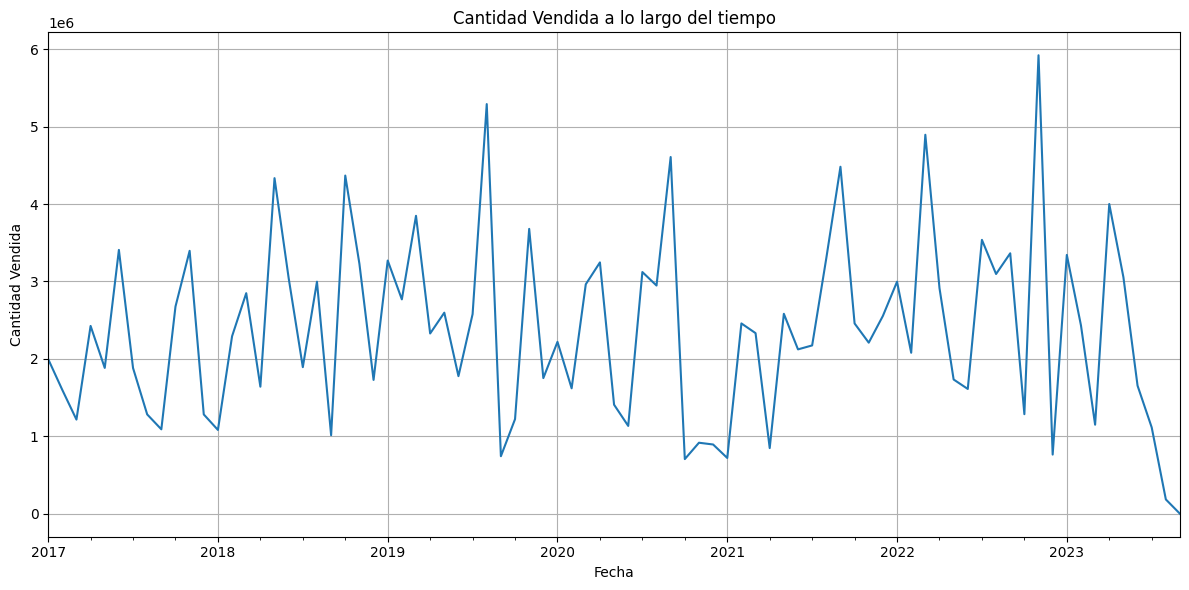

In [111]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos
df = pd.read_excel("BASE DATA THE COCA COLA COMPANY.xlsx")

# Convertir la columna 'fecha_periodo' a formato datetime y establecerla como índice
df['fecha_periodo'] = pd.to_datetime(df['fecha_periodo'])
df.set_index('fecha_periodo', inplace=True)

# Gráfico de líneas para las Ventas Totales a lo largo del tiempo
sales_time_series = df['VENTAS'].resample('M').sum()
plt.figure(figsize=(12, 6))
sales_time_series.plot()
plt.title('Ventas Totales a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Ventas Totales')
plt.grid(True)
plt.tight_layout()
plt.show()

# Gráfico de líneas para la Cantidad Vendida a lo largo del tiempo
# Asumiendo que hay una columna llamada 'CANTIDAD' que representa la cantidad vendida
quantity_time_series = df['CANTIDAD'].resample('M').sum()
plt.figure(figsize=(12, 6))
quantity_time_series.plot()
plt.title('Cantidad Vendida a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Cantidad Vendida')
plt.grid(True)
plt.tight_layout()
plt.show()


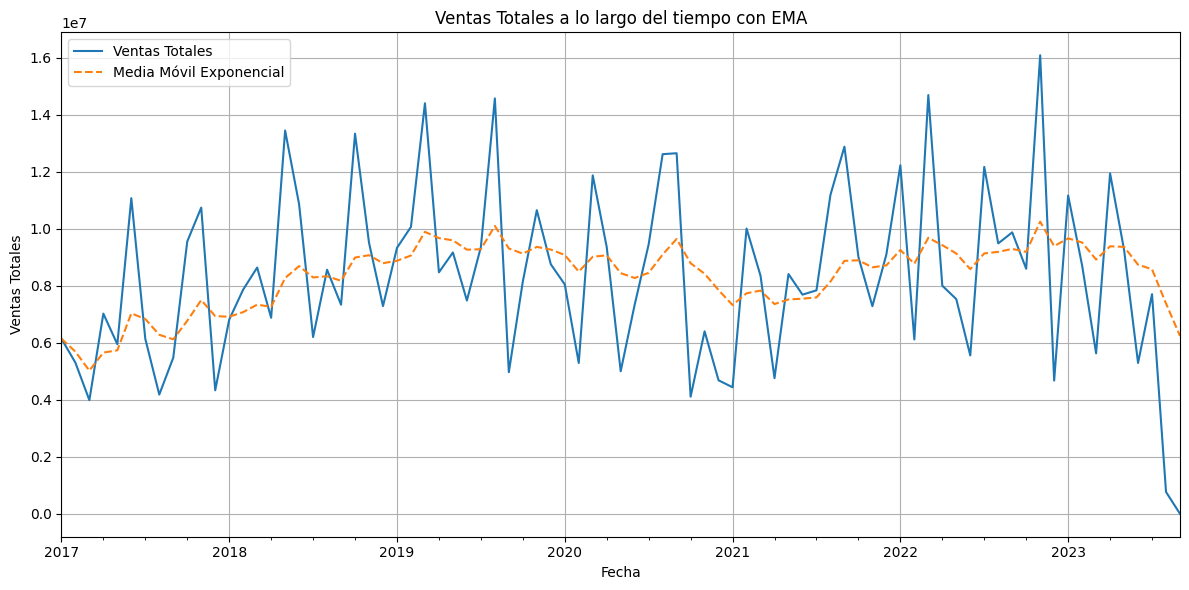

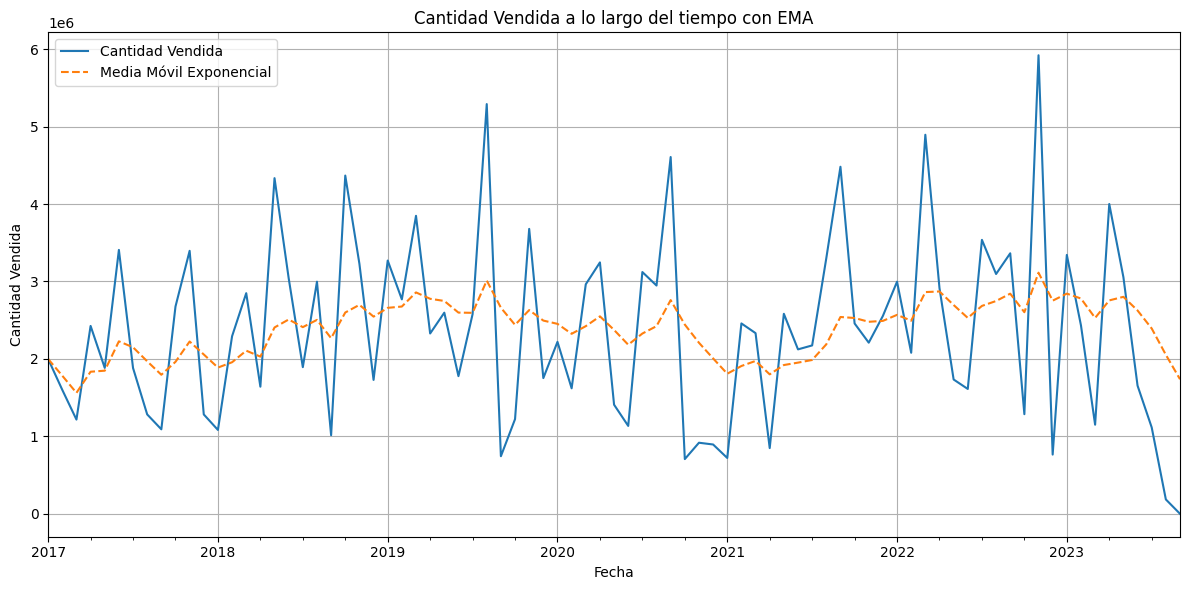

In [110]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos
df = pd.read_excel("BASE DATA THE COCA COLA COMPANY.xlsx")

# Convertir la columna 'fecha_periodo' a formato datetime y establecerla como índice
df['fecha_periodo'] = pd.to_datetime(df['fecha_periodo'])
df.set_index('fecha_periodo', inplace=True)

# Gráfico de líneas para las Ventas Totales a lo largo del tiempo
sales_time_series = df['VENTAS'].resample('M').sum()
sales_ema = sales_time_series.ewm(span=12).mean()  # EMA con una ventana de 12 meses

plt.figure(figsize=(12, 6))
sales_time_series.plot(label='Ventas Totales')
sales_ema.plot(label='Media Móvil Exponencial', linestyle='--')
plt.title('Ventas Totales a lo largo del tiempo con EMA')
plt.xlabel('Fecha')
plt.ylabel('Ventas Totales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Gráfico de líneas para la Cantidad Vendida a lo largo del tiempo
# Asumiendo que hay una columna llamada 'CANTIDAD' que representa la cantidad vendida
quantity_time_series = df['CANTIDAD'].resample('M').sum()
quantity_ema = quantity_time_series.ewm(span=12).mean()  # EMA con una ventana de 12 meses

plt.figure(figsize=(12, 6))
quantity_time_series.plot(label='Cantidad Vendida')
quantity_ema.plot(label='Media Móvil Exponencial', linestyle='--')
plt.title('Cantidad Vendida a lo largo del tiempo con EMA')
plt.xlabel('Fecha')
plt.ylabel('Cantidad Vendida')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


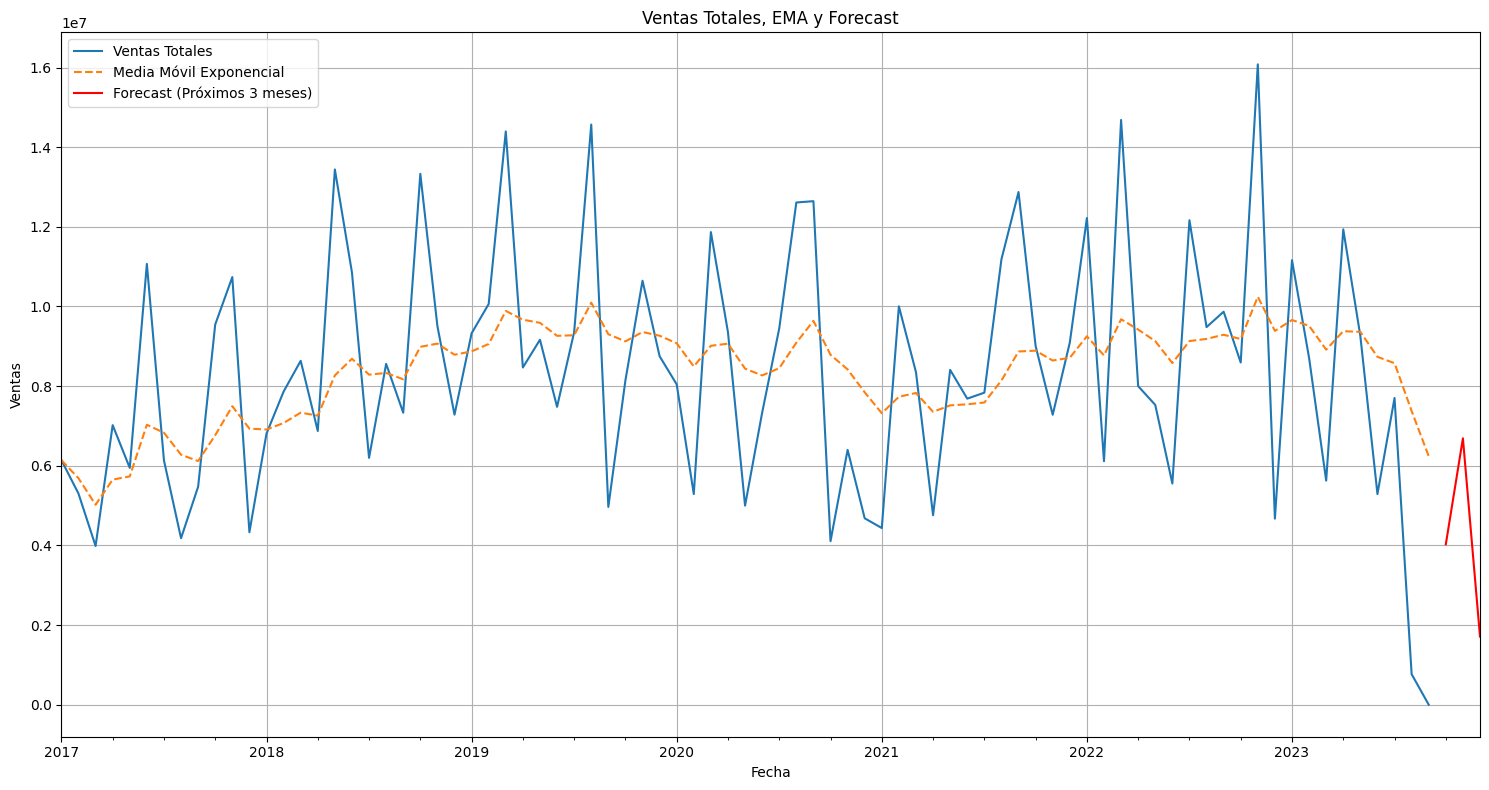

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Cargar los datos
df = pd.read_excel("BASE DATA THE COCA COLA COMPANY.xlsx")
df['fecha_periodo'] = pd.to_datetime(df['fecha_periodo'])
df.set_index('fecha_periodo', inplace=True)

# Agregar las ventas para obtener una serie temporal
time_series = df['VENTAS'].resample('M').sum()

# Definir parámetros para el modelo SARIMA (estos parámetros pueden requerir ajuste)
p, d, q = 1, 1, 1
P, D, Q, S = 1, 1, 1, 12

# Ajustar el modelo SARIMA
sarima_model = SARIMAX(time_series, order=(p, d, q), seasonal_order=(P, D, Q, S))
sarima_result = sarima_model.fit(disp=False)

# Realizar predicciones para los próximos 3 meses
forecast = sarima_result.get_forecast(steps=3).predicted_mean

# Calcular la EMA
sales_ema = time_series.ewm(span=12).mean()

# Gráfico de ventas, EMA y predicciones
plt.figure(figsize=(15, 8))
time_series.plot(label='Ventas Totales', legend=True)
sales_ema.plot(label='Media Móvil Exponencial', linestyle='--', legend=True)
forecast.plot(label='Forecast (Próximos 3 meses)', color='red', legend=True)

plt.title('Ventas Totales, EMA y Forecast')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.grid(True)
plt.tight_layout()
plt.show()
